# Meteo Wetterdaten Analyse

## Import

More information about impyla see here: https://github.com/cloudera/impyla.

In [1]:
from impala.dbapi import connect 
from impala.util import as_pandas
import pandas as pd # For Data Handling
import numpy as np  # data processing, CSV file I/O (e.g. pd.read_csv)
import math as mt
import datetime as dt # To convert timestamp data
import matplotlib   #for plots
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
matplotlib.style.use('ggplot')
%matplotlib inline

## Connect to DataHost wh-02 (172.16.10.102)

Connect to Impala and execute show tables to see all avilable tables.

In [2]:
# jdbc:impala://zhhaphmp-hala01.it.bwns.ch:21050;AuthMech=0;
conn = connect(host='172.16.10.102', port=21050)
cur = conn.cursor()
cur.execute('SHOW TABLES')
dfp = as_pandas(cur)
cur.close()
#To see all tables tip only dfp without .head()
dfp.head()

,name
0,birchli_roh
1,meteo_einsiedeln
2,open_weather_6340_1513956438
3,solarlog
4,solarlog_roh


Connect to DataNode and show 5 entries from the solarlog_roh table.

In [3]:
#Test other aproach to select
# jdbc:impala://zhhaphmp-hala01.it.bwns.ch:21050;AuthMech=0;
conn = connect(host='172.16.10.102', port=21050)
cur = conn.cursor()
cur.execute('SELECT * FROM meteo_einsiedeln order by time')
df = as_pandas(cur)
cur.close()
conn.close()
#To see all tables tip only dfp without .head()
df.head()

,station,time,uto200s0,tre200s0,hto000s0,gre000z0,rre150z0,sre000z0
0,EIN,201201010000,-,-,-,-,-,-
1,EIN,201201010010,-,-,-,-,-,-
2,EIN,201201010020,-,-,-,-,-,-
3,EIN,201201010030,-,-,-,-,-,-
4,EIN,201201010040,-,-,-,-,-,-


In [4]:
len(df)

317232

In [5]:
df['globalstrahlung'] = pd.to_numeric(df['gre000z0'], errors='coerce')
df.gre000z0.describe()

count     317232
unique      1156
top            0
freq      152224
Name: gre000z0, dtype: object

In [6]:
df['lufttemperatur'] = pd.to_numeric(df['tre200s0'], errors='coerce')
df.lufttemperatur.describe()

count    306225.000000
mean          7.854601
std           7.811333
min         -23.300000
25%           1.700000
50%           7.900000
75%          13.600000
max          31.100000
Name: lufttemperatur, dtype: float64

In [7]:
#df['timestamp'] = pd.to_datetime(df['time'],format='%y%m%d%H%M')

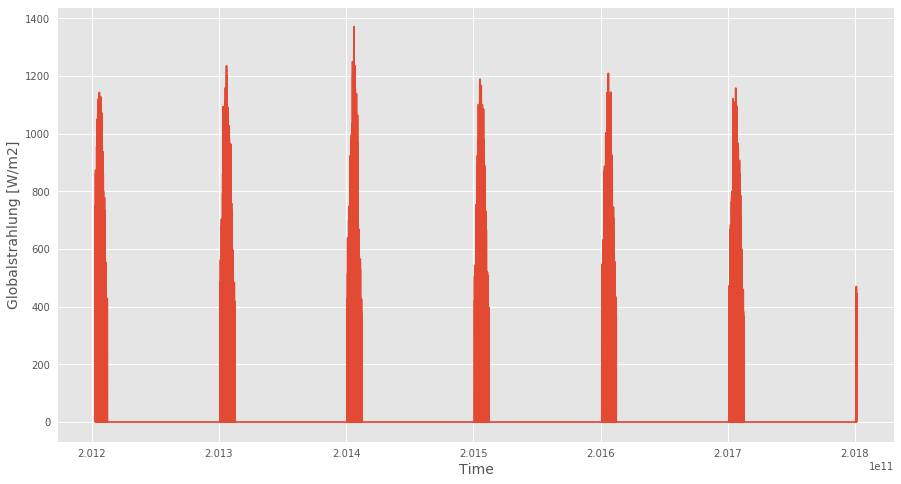

In [8]:
# Time Series Plot
plt.figure(figsize = (15,8))
plt.plot(df.time,df.globalstrahlung)
plt.ylabel("Globalstrahlung [W/m2]",size=14)
plt.xlabel("Time",size=14)
plt.show()

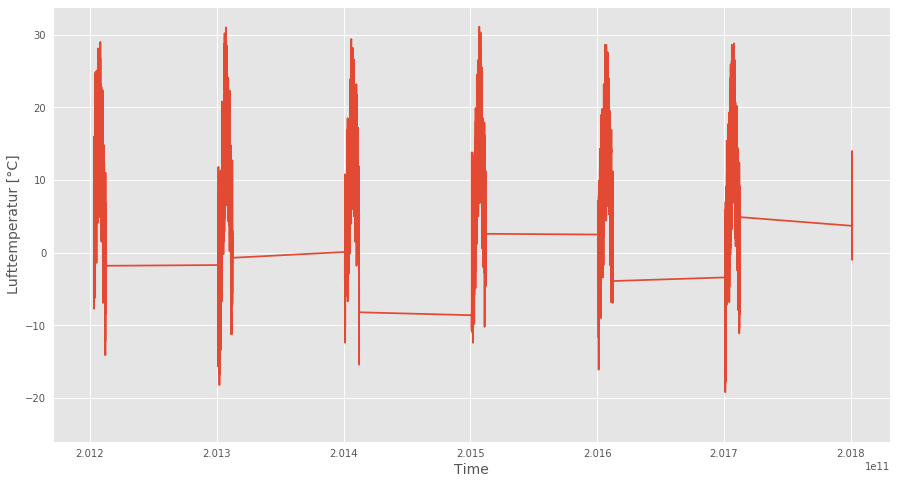

In [9]:
# Time Series Plot
plt.figure(figsize = (15,8))
plt.plot(df.time,df.lufttemperatur)
plt.ylabel("Lufttemperatur [°C]",size=14)
plt.xlabel("Time",size=14)
plt.show()